In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
iris = datasets.load_iris()

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from time import time
import matplotlib.pyplot as plt
from operator import itemgetter

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
path = '..//..//..//Documents//Test_sets//Testing_Sample//HOG_testsets_10m//comp//'

In [3]:
dataset = pd.read_csv(path+"Meanfinal//Mean10m_o4p3b1.csv")

In [4]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)
# dataset = dataset.astype(float)
len(dataset)

2710

In [5]:
target = dataset['Selection']
data = dataset.drop(['Selection'], axis=1)
#data = dataset.drop(['B2','B3','B1','B4','B5','B6', 'B7', 'B8','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11', 'C12', 'C13', 'C14', 'C15','C16','Selection'], axis=1)

In [6]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: Selection, dtype: int64

In [7]:
data.head()

,A,B1,B2,B3,B4,B5,B6,B7,B8,C1,...,C11,C12,C13,C14,C15,C16,mindep,cellav,allav,drange
0,0.699105,0.523597,0.845961,0.707071,7.070568e-01,0.935508,0.642501,0.942804,0.777002,0.757460,...,0.766343,0.734142,0.162051,0.526465,7.070355e-01,0.728974,11.423400,0.301484,-3.038687,0.649180
1,0.999974,0.142582,0.707075,0.945545,9.999347e-01,0.707076,0.090803,0.793582,0.169831,0.771725,...,0.342583,0.828063,0.471201,0.447688,7.367055e-01,0.568848,7.831703,0.886610,0.553010,2.147247
2,0.999963,0.550400,0.597798,0.294841,4.276751e-01,0.999954,0.535919,0.581665,0.110038,0.796352,...,0.914972,0.793153,0.155752,0.447560,8.254675e-01,0.501214,8.991404,0.700686,-0.606691,1.367596
3,0.999910,0.707036,0.999910,0.707046,5.316222e-01,0.707041,0.937026,0.707034,0.325267,0.789565,...,0.999781,0.716628,0.757299,0.315604,6.122590e-17,0.315621,8.273400,0.326139,0.111313,0.684095
4,0.512527,0.854831,0.999893,0.707051,6.122679e-17,0.707054,0.781595,0.350121,0.524829,0.999885,...,0.599616,0.444587,0.189328,0.315615,7.070513e-01,0.315622,7.240050,0.329985,1.144663,0.757059


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
dfList = dataset['Selection'].tolist()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, dfList, test_size=0.3, stratify = target,random_state=16)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [13]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score (y_test,predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.696
Mean accuracy score: 0.689


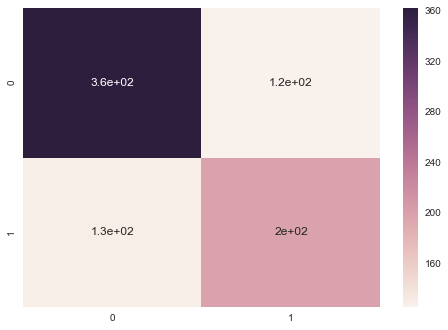

In [14]:
from sklearn.metrics import confusion_matrix 

cm = pd.DataFrame(confusion_matrix(y_test,predicted))
sns.heatmap(cm, annot = True)
plt.show()